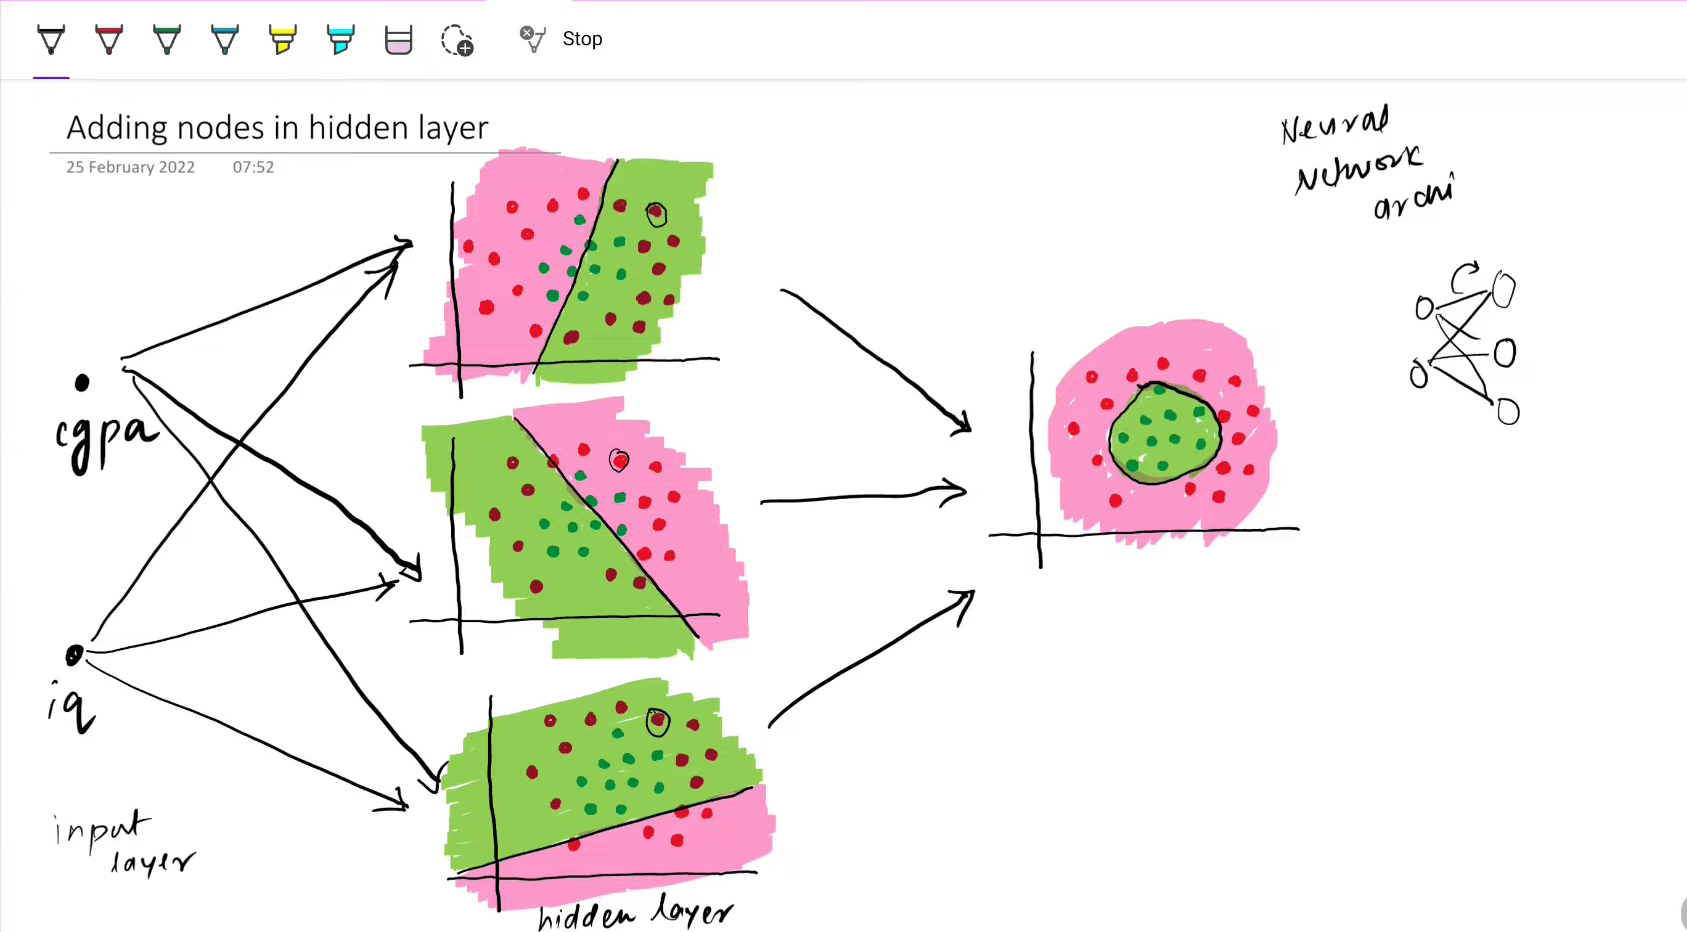

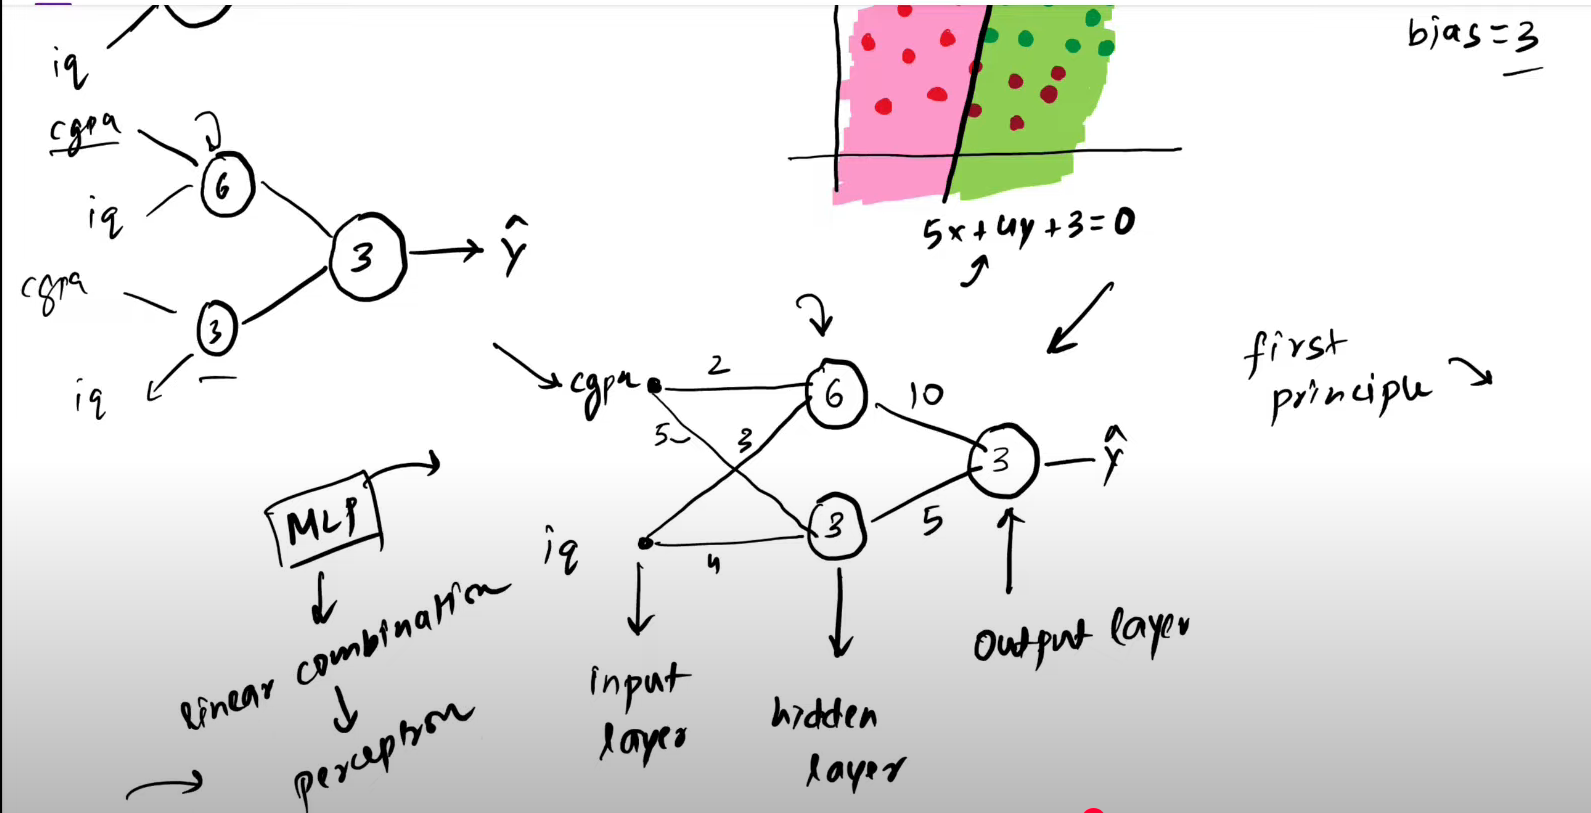

p.

We’ll focus on a simple MLP with:

- **1 hidden layer**
- **ReLU activation** in the hidden layer
- **Sigmoid activation** in the output layer
- **Binary cross-entropy loss**
- **Manual backpropagation**

---

## 🧮 1. Notation

Let’s define:
- Input vector: $ \mathbf{x} \in \mathbb{R}^{n} $
- Hidden layer weights: $ \mathbf{W}_1 \in \mathbb{R}^{n \times h} $
- Hidden layer bias: $ \mathbf{b}_1 \in \mathbb{R}^{1 \times h} $
- Output layer weights: $ \mathbf{W}_2 \in \mathbb{R}^{h \times 1} $
- Output layer bias: $ b_2 \in \mathbb{R} $

Where:
- $ n $ = number of input features
- $ h $ = number of hidden units

---

## 🔁 2. Forward Pass (Math Only)

### Step 1: Hidden Layer

$$
\mathbf{z}_1 = \mathbf{x} \mathbf{W}_1 + \mathbf{b}_1 \quad \text{(Linear transformation)}
$$
$$
\mathbf{a}_1 = \text{ReLU}(\mathbf{z}_1) = \max(0, \mathbf{z}_1) \quad \text{(Non-linear activation)}
$$

### Step 2: Output Layer

$$
z_2 = \mathbf{a}_1 \mathbf{W}_2 + b_2 \quad \text{(Linear output)}
$$
$$
\hat{y} = \sigma(z_2) = \frac{1}{1 + e^{-z_2}} \quad \text{(Sigmoid for binary classification)}
$$

---

## 📉 3. Loss Function (Binary Cross-Entropy)

$$
\mathcal{L} = -\left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

> This is for one training example. For multiple examples, average over all.

---

## 🧠 4. Backward Pass (Gradients)

We compute derivatives to update weights using gradient descent.

### Step 1: Derivative w.r.t Output

$$
\frac{\partial \mathcal{L}}{\partial z_2} = \hat{y} - y
$$

### Step 2: Derivatives for Output Layer

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_2} = \mathbf{a}_1^\top \cdot \frac{\partial \mathcal{L}}{\partial z_2}
$$
$$
\frac{\partial \mathcal{L}}{\partial b_2} = \frac{\partial \mathcal{L}}{\partial z_2}
$$

### Step 3: Derivative to Hidden Layer

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{a}_1} = \frac{\partial \mathcal{L}}{\partial z_2} \cdot \mathbf{W}_2^\top
$$
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{z}_1} = \frac{\partial \mathcal{L}}{\partial \mathbf{a}_1} \odot \text{ReLU}'(\mathbf{z}_1)
$$
Where:
- $ \odot $ is element-wise multiplication
- $ \text{ReLU}'(x) = 1 $ if $ x > 0 $, else $ 0 $

### Step 4: Derivatives for Hidden Weights and Biases

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_1} = \mathbf{x}^\top \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{z}_1}
$$
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b}_1} = \frac{\partial \mathcal{L}}{\partial \mathbf{z}_1}
$$

---

## 🔄 5. Update Weights Using Gradient Descent

For each weight/bias:

$$
\mathbf{W}_2 := \mathbf{W}_2 - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{W}_2}
$$
$$
b_2 := b_2 - \eta \cdot \frac{\partial \mathcal{L}}{\partial b_2}
$$
$$
\mathbf{W}_1 := \mathbf{W}_1 - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{W}_1}
$$
$$
\mathbf{b}_1 := \mathbf{b}_1 - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{b}_1}
$$

Where $ \eta $ is the learning rate.

---

## ✅ Summary Table

| Step | Math |
|------|------|
| Hidden Linear | $ \mathbf{z}_1 = \mathbf{x} \mathbf{W}_1 + \mathbf{b}_1 $ |
| Hidden Activation | $ \mathbf{a}_1 = \text{ReLU}(\mathbf{z}_1) $ |
| Output Linear | $ z_2 = \mathbf{a}_1 \mathbf{W}_2 + b_2 $ |
| Output Activation | $ \hat{y} = \sigma(z_2) $ |
| Loss | $ \mathcal{L} = -[y \log \hat{y} + (1-y)\log(1-\hat{y})] $ |
| Output Gradient | $ \frac{\partial \mathcal{L}}{\partial z_2} = \hat{y} - y $ |
| Hidden Gradient | $ \frac{\partial \mathcal{L}}{\partial \mathbf{z}_1} = (\hat{y} - y) \cdot \mathbf{W}_2^\top \odot \text{ReLU}'(\mathbf{z}_1) $ |
| Weight Updates | $ \mathbf{W} := \mathbf{W} - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{W}} $ |

---

## 🎯 Why It Works

Even though each operation is linear or simple non-linearity, stacking them allows the model to learn complex **non-linear decision boundaries** — like XOR.

The **backpropagation algorithm** computes gradients efficiently using the chain rule, making it possible to train deep networks manually or automatically.

---





---

# 🔥 Understanding MLPs: The Math and Intuition

## 🧠 What is an MLP?

A **Multi-Layer Perceptron (MLP)** is a class of **feedforward neural network** that consists of:

- An **input layer**
- One or more **hidden layers**
- An **output layer**

Each neuron in the network performs two operations:

1. A **linear transformation** (like matrix multiplication + bias)
2. A **non-linear activation function**

This combination allows MLPs to model **complex non-linear relationships** between inputs and outputs.

---

## 📐 Core Components of an MLP

Let’s walk through each step of an MLP using **math and intuition**, assuming we're working with a simple MLP that has one hidden layer.

### 🧮 Notation

| Symbol | Meaning |
|--------|---------|
| $ \mathbf{x} \in \mathbb{R}^{n} $ | Input vector with $ n $ features |
| $ \mathbf{W}_1 \in \mathbb{R}^{n \times h} $ | Weight matrix from input to hidden layer |
| $ \mathbf{b}_1 \in \mathbb{R}^{1 \times h} $ | Bias vector for hidden layer |
| $ \mathbf{z}_1 \in \mathbb{R}^{h} $ | Pre-activation output of hidden layer |
| $ \mathbf{a}_1 \in \mathbb{R}^{h} $ | Activated output of hidden layer |
| $ \mathbf{W}_2 \in \mathbb{R}^{h \times 1} $ | Weight matrix from hidden to output |
| $ b_2 \in \mathbb{R} $ | Output bias |
| $ z_2 \in \mathbb{R} $ | Pre-activation output of final layer |
| $ \hat{y} \in [0,1] $ | Final prediction (e.g., probability) |

Where:
- $ n $ = number of input features
- $ h $ = number of hidden units

---

## 🔁 Forward Pass (Intuition + Math)

The forward pass transforms the input into a prediction by applying linear transformations and non-linear activations.

### Step 1: Hidden Layer

#### Linear Transformation:
$$
\mathbf{z}_1 = \mathbf{x} \mathbf{W}_1 + \mathbf{b}_1
$$

> Think of this as computing a weighted sum of inputs for each hidden unit.

#### Non-Linear Activation:
$$
\mathbf{a}_1 = \text{ReLU}(\mathbf{z}_1)
$$

> ReLU introduces **non-linearity** — it "turns on" only when the input is positive.
>
> Without this, stacking layers would just be equivalent to a single linear operation.

---

### Step 2: Output Layer

#### Linear Transformation:
$$
z_2 = \mathbf{a}_1 \mathbf{W}_2 + b_2
$$

> This aggregates the activated hidden outputs into a single value.

#### Sigmoid Function (for binary classification):
$$
\hat{y} = \sigma(z_2) = \frac{1}{1 + e^{-z_2}}
$$

> Converts the raw output into a **probability between 0 and 1**.

---

## 📉 Loss Function: Measuring Error

We need a way to measure how far our prediction $ \hat{y} $ is from the true label $ y $. For binary classification, we use:

$$
\mathcal{L} = -\left[ y \log(\hat{y}) + (1 - y)\log(1 - \hat{y}) \right]
$$

This is called **binary cross-entropy loss**.

> The closer $ \hat{y} $ is to $ y $, the smaller the loss.

---

## 🧠 Backpropagation: Learning via Gradients

Backpropagation uses the **chain rule of calculus** to compute gradients of the loss with respect to each weight and bias. These gradients tell us how to tweak the weights to reduce the error.

Let’s break down how we compute the gradient for each parameter.

---

### Step 1: Gradient at Output

$$
\frac{\partial \mathcal{L}}{\partial z_2} = \hat{y} - y
$$

> This tells us how much the final output needs to change to reduce error.

---

### Step 2: Gradient w.r.t Output Weights

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_2} = \mathbf{a}_1^\top \cdot \frac{\partial \mathcal{L}}{\partial z_2}
$$

> This shows how sensitive the loss is to each weight in the second layer.

---

### Step 3: Gradient w.r.t Output Bias

$$
\frac{\partial \mathcal{L}}{\partial b_2} = \frac{\partial \mathcal{L}}{\partial z_2}
$$

> Bias affects all outputs equally, so its gradient is the same as the output gradient.

---

### Step 4: Propagate Error to Hidden Layer

To update the first layer, we need to propagate the error backward:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{a}_1} = \frac{\partial \mathcal{L}}{\partial z_2} \cdot \mathbf{W}_2^\top
$$

Then apply chain rule:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{z}_1} = \frac{\partial \mathcal{L}}{\partial \mathbf{a}_1} \odot \text{ReLU}'(\mathbf{z}_1)
$$

Where:
- $ \odot $ = element-wise multiplication
- $ \text{ReLU}'(x) = 1 $ if $ x > 0 $, else $ 0 $

> This tells us how changes in pre-activation values affect the loss.

---

### Step 5: Gradient w.r.t First Layer Weights & Biases

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}_1} = \mathbf{x}^\top \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{z}_1}
$$
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{b}_1} = \frac{\partial \mathcal{L}}{\partial \mathbf{z}_1}
$$

---

## 🔄 Update Rule: Gradient Descent

Once we have all the gradients, we update each parameter:

$$
\mathbf{W}_1 := \mathbf{W}_1 - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{W}_1}
$$
$$
\mathbf{b}_1 := \mathbf{b}_1 - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{b}_1}
$$
$$
\mathbf{W}_2 := \mathbf{W}_2 - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{W}_2}
$$
$$
b_2 := b_2 - \eta \cdot \frac{\partial \mathcal{L}}{\partial b_2}
$$

Where:
- $ \eta $ is the **learning rate**
- Larger values mean faster updates but may overshoot
- Smaller values mean slower learning but more precise

---

## 🎯 Why Stacking Linear Layers ≠ Deep Learning

Here’s a critical insight:

> ❌ **Linear → Linear = Linear**
>
> If you stack two linear transformations without any non-linear activation, you end up with another linear function.

Example:
$$
\hat{y} = (\mathbf{x} \mathbf{W}_1 + \mathbf{b}_1) \mathbf{W}_2 + b_2 = \mathbf{x} (\mathbf{W}_1 \mathbf{W}_2) + (\mathbf{b}_1 \mathbf{W}_2 + b_2)
$$

So, multiple linear layers are **just a single linear layer in disguise**.

✅ But once you add a **non-linear activation**, like ReLU or sigmoid, the whole function becomes **non-linear**, allowing the model to learn complex patterns.

---

## 🧩 Intuition Behind Non-Linearity

Think of each hidden neuron as a **feature detector**. When you stack these detectors and activate them conditionally (via ReLU), they can combine to form **logical expressions**, **curves**, or even **decision boundaries** that aren’t straight lines.

For example, the XOR problem requires a **non-linear decision boundary** — something a single neuron can't do, but an MLP with one hidden layer can.

---

## ✅ Summary: How MLP Learns

| Stage | What Happens | Purpose |
|-------|--------------|---------|
| Forward Pass | Input flows through layers with weights and activations | Makes predictions |
| Loss Calculation | Compares prediction to true label | Measures error |
| Backward Pass | Computes gradients using chain rule | Tells how to improve weights |
| Weight Update | Adjusts weights in direction that reduces error | Learns from data |

---

## 🧠 Key Takeaways

- MLPs are made of **stacked linear and non-linear layers**.
- **Non-linear activations** are essential — they allow MLPs to learn complex patterns.
- **Backpropagation** computes gradients efficiently using the chain rule.
- **Gradient descent** updates weights to minimize loss.
- Multiple linear layers without activation are useless — they’re still linear!
- MLPs are powerful because they combine **simple functions** into **complex ones**.

---





---

## 🎓 1. Free Online Courses (Beginner-Friendly)

### 🔹 [Deep Learning Specialization by Andrew Ng (Coursera)](https://www.coursera.org/specializations/deep-learning)
- **Best For:** Structured theoretical introduction
- **Topics Covered:**
  - Neural Networks
  - Backpropagation
  - CNNs, RNNs
  - Hyperparameter tuning
- **Platform:** Coursera
- **Cost:** Free audit available

> 💡 *This is the gold standard for beginners.*

---

### 🔹 [Fast.ai Practical Deep Learning for Coders](https://course.fast.ai/)
- **Best For:** Hands-on coding-first approach
- **Topics Covered:**
  - Image classification
  - NLP
  - Tabular data
  - Transfer learning
- **Platform:** Fast.ai
- **Cost:** Free

> 💡 *You'll write real code from day one using PyTorch.*

---

### 🔹 [Google Developers – Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course)
- **Best For:** Quick intro to ML & TensorFlow basics
- **Topics Covered:**
  - Linear Regression
  - Classification
  - Neural Nets
  - TensorFlow
- **Platform:** Google Developers
- **Cost:** Free

> 💡 *Good if you’re comfortable with Python and want to learn TensorFlow quickly.*

---

## 📘 2. Books (Free & Paid)

### 🔹 [Deep Learning (Ian Goodfellow, Yoshua Bengio, Aaron Courville)](https://www.deeplearningbook.org/)
- **Best For:** Theory-heavy learners
- **Topics Covered:**
  - Math background
  - Optimization
  - CNNs, RNNs
- **Format:** PDF available online
- **Cost:** Free (PDF), Paid (Hardcover)

> 💡 *The “bible” of deep learning. Great reference once you have some basics.*

---

### 🔹 [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (Aurélien Géron)](https://github.com/ageron/handson-ml3)
- **Best For:** Practical coding with TensorFlow
- **Topics Covered:**
  - Supervised learning
  - Neural networks
  - CNNs & RNNs
- **Format:** Book + GitHub repo
- **Cost:** Paid (but sample chapters free on GitHub)

> 💡 *Excellent for coders who want to build projects right away.*

---

## 🧑‍🏫 3. YouTube Channels (Free Tutorials)

### 🔹 [3Blue1Brown – Neural Networks Series](https://www.youtube.com/playlist?list=PLZHQObOWTdfPdw27uiZGQUJqlQSCE1ZEk)
- **Best For:** Visual intuition behind neural nets
- **Topics Covered:**
  - What is a neural network?
  - Backpropagation
  - Gradient descent

> 💡 *Perfect for visual learners. Beautiful animations.*

---

### 🔹 [Two Minute Papers](https://www.youtube.com/c/K%C3%A1rolyZsolnai/videos)
- **Best For:** Staying updated on AI research
- **Topics Covered:**
  - Research papers explained
  - Cool AI applications
- **Length:** ~2–5 min videos

> 💡 *Not beginner-focused but great for inspiration.*

---

### 🔹 [Python Engineer](https://www.youtube.com/c/PythonEngineer)
- **Best For:** Practical deep learning and PyTorch tutorials
- **Topics Covered:**
  - Neural networks
  - Computer Vision
  - NLP

> 💡 *Lots of code examples. Easy to follow along.*

---

## 🧪 4. Interactive Tools & Platforms

### 🔹 [TensorFlow Playground](https://playground.tensorflow.org/)
- **Best For:** Visualizing how neural networks work
- **Features:**
  - Change layer sizes
  - Try different activation functions
  - See training live

> 💡 *No code required. Perfect for understanding how hyperparameters affect learning.*

---

### 🔹 [Kaggle Learn](https://www.kaggle.com/learn)
- **Best For:** Short, project-based learning
- **Topics Covered:**
  - Intro to deep learning
  - Computer vision
  - NLP
- **Format:** Micro-courses
- **Cost:** Free

> 💡 *Learn while competing in beginner-friendly competitions.*

---

## 📚 5. Blogs & Articles

### 🔹 [Towards Data Science](https://towardsdatascience.com/)
- **Best For:** Real-world applications and tutorials
- **Topics Covered:**
  - Deep learning
  - Career advice
  - Case studies

> 💡 *Great for staying updated and seeing how others apply deep learning.*

---

### 🔹 [Distill.pub](https://distill.pub/)
- **Best For:** Beautiful visual explanations of ML concepts
- **Topics Covered:**
  - Neural network interpretability
  - Visualization techniques
  - Model comparison

> 💡 *High-quality content for deeper understanding.*

---

## 🧩 6. Practice Projects (Beginner-Friendly)

Try these small projects to get hands-on:

| Project | Description |
|--------|-------------|
| 🧠 XOR MLP | Build a simple MLP to solve the XOR problem |
| 🐶 Cat vs Dog Classifier | Use transfer learning with pre-trained models |
| 📄 Handwritten Digit Recognition | Use MNIST dataset with simple CNN |
| 🗣️ Sentiment Analysis | Classify movie reviews as positive/negative |

> 💡 You can find starter code and datasets on:
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [PyTorch Tutorials](https://pytorch.org/tutorials/)
- [TensorFlow Examples](https://www.tensorflow.org/examples)

---

## 🛠️ 7. Frameworks to Learn

Start with one framework and master the basics before switching.

| Framework | Best For | Resources |
|----------|-----------|-----------|
| **PyTorch** | Research, flexibility | [Official Tutorials](https://pytorch.org/tutorials/) |
| **TensorFlow / Keras** | Production, ease-of-use | [TF Guide](https://www.tensorflow.org/guide) |
| **Fast.ai** | Rapid prototyping | [Fast.ai Course](https://course.fast.ai/) |

---

## ✅ Final Checklist: What to Learn First

| Step | Topic | Resource |
|------|-------|----------|
| 1 | Python Basics | [W3Schools](https://www.w3schools.com/python/) |
| 2 | Linear Algebra & Calculus | Khan Academy |
| 3 | NumPy, Pandas, Matplotlib | [Real Python](https://realpython.com/) |
| 4 | Introduction to ML | Andrew Ng's ML Course |
| 5 | Introduction to DL | Fast.ai or Andrew Ng's DL Course |
| 6 | Build Small Projects | Kaggle, GitHub |
| 7 | Join Communities | Reddit (r/learnmachinelearning), Discord groups |

---

## 🤝 Bonus: Join Communities

- Reddit: r/learnmachinelearning, r/deeplearning
- Discord: Fast.ai, Hugging Face, OpenMined
- Stack Overflow: Ask and answer questions
- LinkedIn Groups: Search "Deep Learning", "AI Enthusiasts"

---

